In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 53ms/step - accuracy: 0.3486 - loss: 1.7602 - val_accuracy: 0.5282 - val_loss: 1.3120
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.5616 - loss: 1.2354 - val_accuracy: 0.5891 - val_loss: 1.1563
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.6228 - loss: 1.0718 - val_accuracy: 0.6424 - val_loss: 1.0166
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6593 - loss: 0.9673 - val_accuracy: 0.6610 - val_loss: 0.9817
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6888 - loss: 0.8859 - val_accuracy: 0.6736 - val_loss: 0.9220
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7149 - loss: 0.8126 - val_accuracy: 0.6814 - val_loss: 0.9089
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7356 - loss: 0.7620 - val_accuracy: 0.6869 - val_loss: 0.9127
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.7476 -

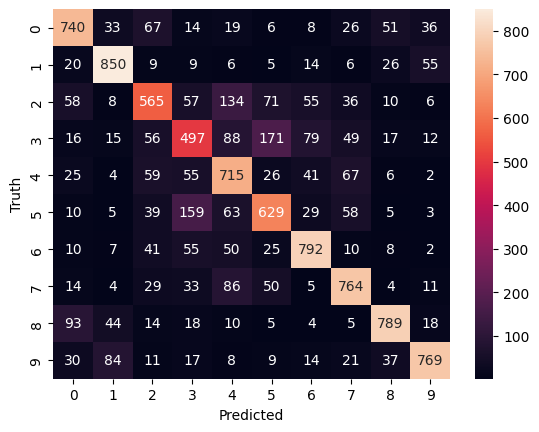

In [7]:


# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# Confusion Matrix
y_pred = model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
